# Basic ML concepts via Linear Regression

The goal of regression is to define a model that explains one measurement using another (or multiple) meaurement. For example we expect that on average the weight of people depends on their height. The simplest assumption is that a straight line goes through our data, which is called linear regression. Here, given a feature or measurement $x$ and another measurement $y$ we want to find the parameters of a line such that $y = f(x) = a*x+b$. The whole point of regression is to find optimal values for $a$ and $b$. Usually we call these parameters **weights** and use the $w$ abbreviatin so that $y = w_0 + w_1 * x$.


Let's look at two variables from the wine dataset:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib widget

In [2]:
#for interactive plots install:
#conda install ipympl -y

In [3]:
wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

In [4]:
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


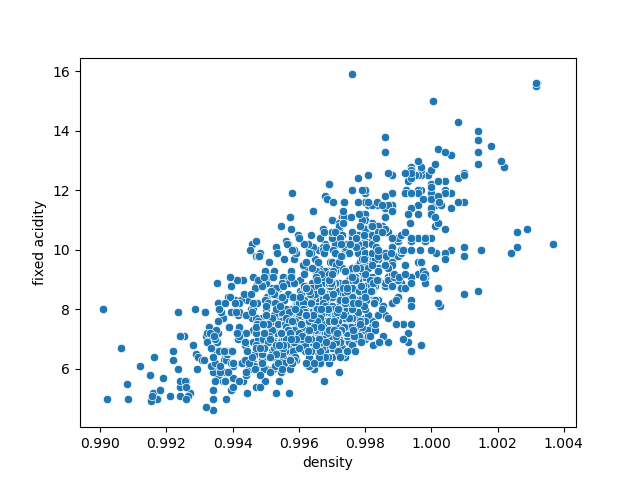

In [5]:
fig, ax = plt.subplots()
sns.scatterplot(data=wine, x='density', y='fixed acidity');

We see that there is a correlation between ```density``` and ```fixed acidity```. We can try to find that actual relation and first assume that: ```fixed acidity``` = $w_0$ + $w_1$*```density```. What we need to do is to find the optimal values fir $w_0$ and $w_1$. This is the simplest linear "combination" that we can do: a fixed values, the bias $w_0$ and a parameter that multiplies the value of one feature.

Let's plot the result for some random choice of parameters e.g. $w_0=-90, w_1=100$:

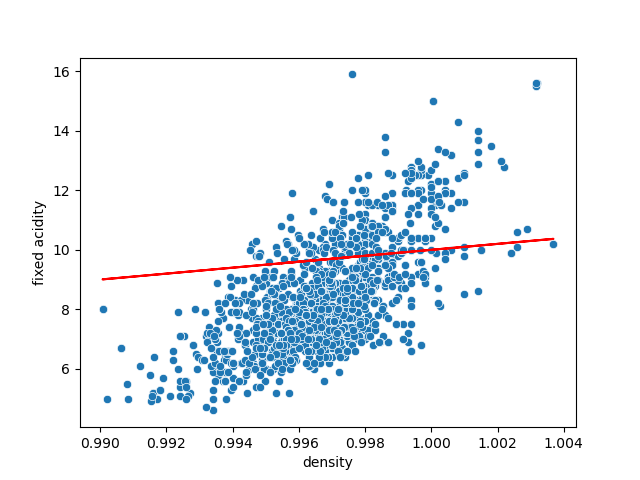

In [6]:
fig, ax = plt.subplots()
sns.scatterplot(data=wine, x='density', y='fixed acidity');
plt.plot(wine['density'], -90 + 100 * wine['density'], 'r');

## Estimating the error

We see that we are quite far away from the correct solution. How can we estimate how far? For each point in our dataset we could now measure its distance to the red line. The goal in the end, is that on average the distance is as small as possible. For this we can simply subtract our actual list of values ```wine['fixed acidity']``` from the model, currently ```-90 + 100 * wine['density']```:

In [7]:
distance_to_model = wine['fixed acidity'] - (-90 + 100 * wine['density'])

Let's plot these distance to have a better idea:

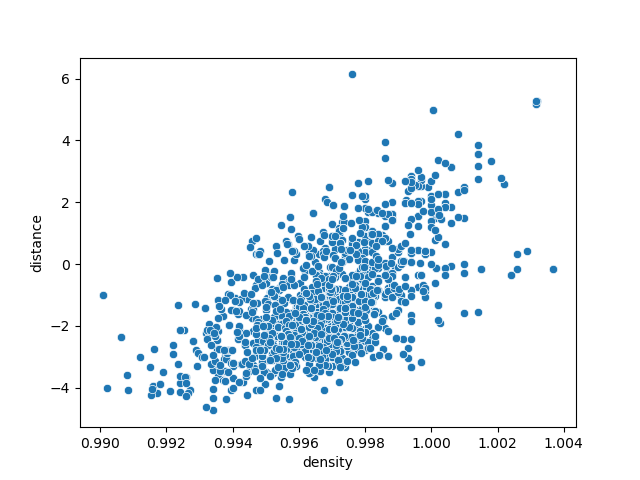

In [8]:
fig, ax = plt.subplots()
ax = sns.scatterplot(x=wine['density'],  y=distance_to_model)
ax.set_ylabel('distance');

We see that we get some negative values on the left when the model predicts higher values than expected and positive when the model is lower than expected on the right. Let's just try to find a slightly better model:

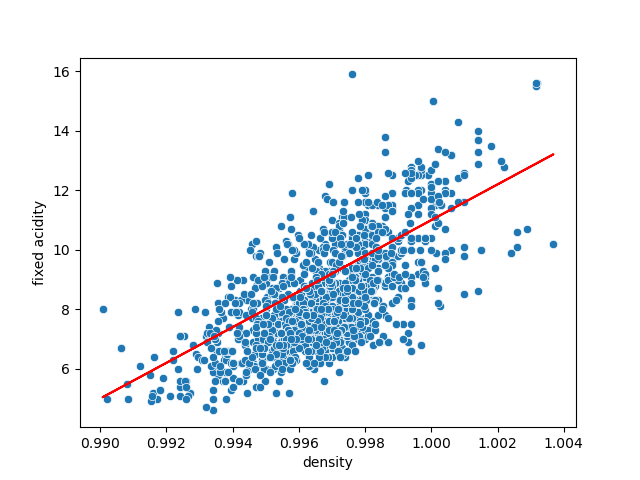

In [9]:
fig, ax = plt.subplots()
sns.scatterplot(data=wine, x='density', y='fixed acidity');
plt.plot(wine['density'], -589 + 600 * wine['density'], 'r');

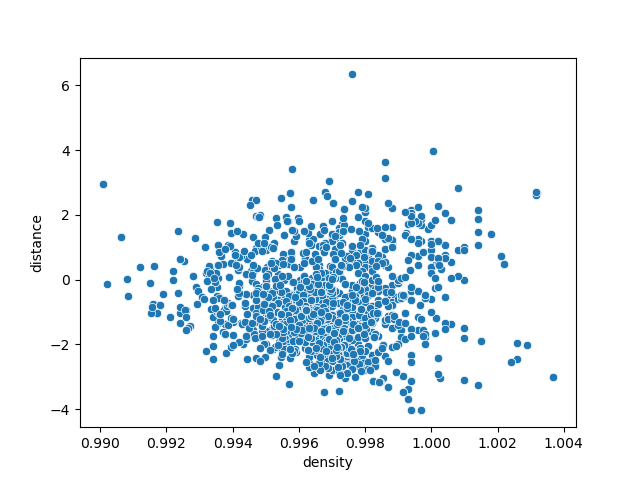

In [10]:
distance_to_model = wine['fixed acidity'] - (-589 + 600 * wine['density'])

fig, ax = plt.subplots()
ax = sns.scatterplot(x=wine['density'],  y=distance_to_model)
ax.set_ylabel('distance');

This looks better now but we need a better way of *quantifying* the quality of the model. We can't just look at such error plots by eye. We could just sum up all values:

In [11]:
total_error = np.sum(distance_to_model)
total_error

-1164.6640000000002

Does this make sense? Let's look at a histogram of our distance values:

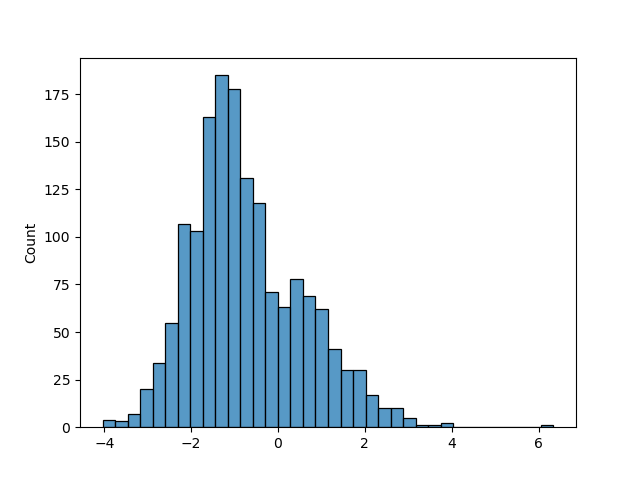

In [12]:
fig, ax = plt.subplots()
sns.histplot(distance_to_model);

If we just take the three largest bins, we should already have a total error of about -1000, so the error seems largely underestimated. The problem is that we are interested in the absolute distance of the model to the data. We don't really care if they are larger or smaller. When we just sum up the distance, the negative and positive errors cancel each other, leading to an underestimation. In the worst case, we would have the same number of points below and above the model and the error would be close to zero. What we need to do is have an actual estimation of the absolute error. We could take the absolute value $abs(x)$, but generally what is done is to just take the square of errors. Now a distance of -3 or +3 always has an error of 9 as $3^2 = -3^2$.

So now we can compute the sum (or mean) of the square of the distances:

In [13]:
square_error = np.sum(distance_to_model**2)
square_error

3532.1135520000007

In [14]:
square_error

3532.1135520000007

## Finding the best solution

In most cases, we will find the best values for the parameters $w_0$ and $w_1$ through an iterative process: we start from a radom point and then try to lower the error of our model. In a simple case like our current line, we can just make a grid of possible values for $w_0$ and $w_1$ and check which are the best. This looks like this:

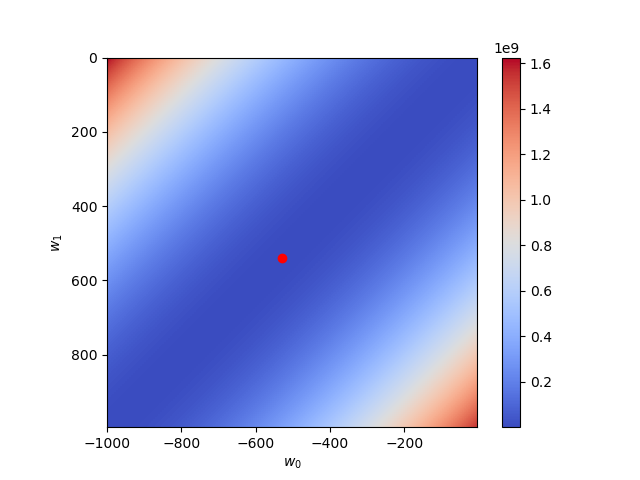

In [23]:
# create a grid of values for the parameters
w0_range = np.arange(-1000,0, 5)
w1_range = np.arange(0, 1000, 5)

grid_0, grid_1 = np.meshgrid(w0_range, w1_range)

# compute error for each point in the grid
grid_mult = grid_0[:,:,np.newaxis] + grid_1[:,:,np.newaxis] * wine['density'].values
grid_mult = (grid_mult - wine['fixed acidity'].values)**2
total_error = np.sum(grid_mult, axis=2)

#find minimal value
min_loc = np.unravel_index(np.argmin(total_error), total_error.shape)

fig, ax = plt.subplots()
im = ax.imshow(total_error, extent=[w0_range[0],w0_range[-1],w1_range[-1],w1_range[0]],cmap=cm.coolwarm)
ax.plot([grid_0[min_loc[0],min_loc[1]]], [grid_1[min_loc[0],min_loc[1]]], 'ro')

ax.set_xlabel('$w_0$')
ax.set_ylabel('$w_1$');
fig.colorbar(im, ax=ax);

In [56]:
np.min(total_error)

2724.7625771200055

In [61]:
total_error[min_loc[0]-5:min_loc[0]+5,min_loc[1]-5:min_loc[1]+5]

array([[3.99945682e+06, 3.24001021e+06, 2.56051360e+06, 1.96096699e+06,
        1.44137038e+06, 1.00172377e+06, 6.42027165e+05, 3.62280556e+05,
        1.62483947e+05, 4.26373379e+04],
       [3.24234568e+06, 2.56258897e+06, 1.96278226e+06, 1.44292555e+06,
        1.00301883e+06, 6.43062122e+05, 3.63055410e+05, 1.62998698e+05,
        4.28919860e+04, 2.73527400e+03],
       [2.56466547e+06, 1.96459865e+06, 1.44448184e+06, 1.00431502e+06,
        6.44098210e+05, 3.63831395e+05, 1.63514580e+05, 4.31477649e+04,
        2.73094994e+03, 4.22641349e+04],
       [1.96641618e+06, 1.44603926e+06, 1.00561235e+06, 6.45135429e+05,
        3.64608511e+05, 1.64031593e+05, 4.34046747e+04, 2.72775668e+03,
        4.20008387e+04, 1.61223921e+05],
       [1.44759782e+06, 1.00691080e+06, 6.46173778e+05, 3.65386757e+05,
        1.64549736e+05, 4.36627152e+04, 2.72569423e+03, 4.17386732e+04,
        1.60701652e+05, 3.59614631e+05],
       [1.00821038e+06, 6.47213259e+05, 3.66166135e+05, 1.65069011e+05,
   

In [58]:
min_loc

(108, 94)

In [73]:
grid_0[min_loc[0],min_loc[1]-15]

-605

In [77]:
grid_1[min_loc[0]+15,min_loc[1]-15]

615

In [78]:
total_error[min_loc[0]+15,min_loc[1]-15]

2846.4844005700043

In this plot we see the error of the model (how well it goes through the points) for each pair of values $w_0$, $w_1$. Dark blue means good model while red means bad model. The red dot indicates the best possible solution with values:

In [54]:
w0 = grid_0[min_loc[0],min_loc[1]]
w0

-530

In [32]:
w1 = grid_1[min_loc[0],min_loc[1]]
w1

540

We can now use this values in our equation $y=w_0 + w_1*x$:

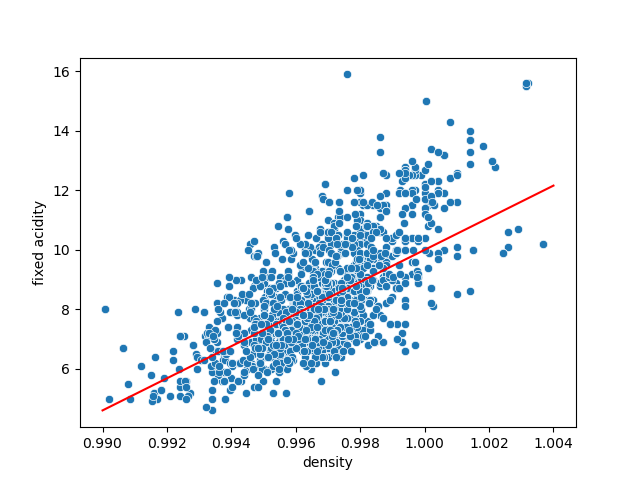

In [34]:
fig, ax = plt.subplots()
sns.scatterplot(data=wine, x='density', y='fixed acidity');
plt.plot(np.arange(0.99, 1.004, 0.001), w0+np.arange(0.99, 1.004, 0.001)*w1, 'r');


Usually we cannot compute directly the optimal value (red dot location) because it would take way too much time to compute the error for all combinations of parameters. In that case we would start from a random point and search for the solution in an *iterative* way. We can represent the error plot in 3D to understand better. Let's assume we start from the location of the yellow dot:

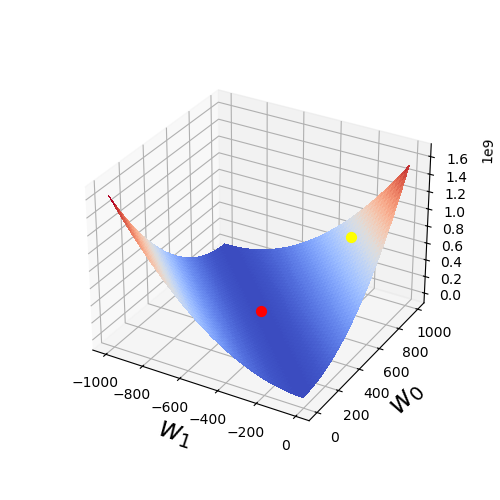

In [43]:
fig = plt.figure(figsize=(5,5))

X = grid_0.copy()
Y = grid_1.copy()
Z = total_error.copy()

ax = fig.add_subplot(1, 1, 1, projection='3d',computed_zorder=False)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)#, vmax=5)

ax.scatter([grid_0[180, 150]],[grid_1[180, 150]], [total_error[180, 150]], c='yellow', s=50)
ax.scatter([grid_0[min_loc[0],min_loc[1]]],[grid_1[min_loc[0],min_loc[1]]], [total_error[min_loc[0],min_loc[1]]], c='red', s=50)

grid_1[min_loc[0],min_loc[1]]
ax.set_xlabel('$w_1$', fontdict={'fontsize':20})
ax.set_ylabel('$w_0$', fontdict={'fontsize':20});

We can now imagine taking many small steps downhill. Eventually, we would reach the bottom of the blue valley, where the red dot is, which would correspond to the best value. This approach is very common in ML and is called gradient descent, gradient being a synonym for slope. The idea of the algorithm is to follow the steepest slope to find the minimal error!

## Finding the best solution with scikit-learn

In reality, we don't have to perform all these steps ourselves, we can use algorithm that have been implemented and optimized in libraries like scikit-learn. The simplest such algorithm is just called ```LinearRegression``` and is available in the submodule ```linear_model``` (technically, ```LinearRegression``` doesn't use gradient descent but ```LinearRegressionSGD``` does):

In [44]:
from sklearn import linear_model

A large part of the algorithms implemented in scikit-learn in a similar way:

1. Create arrays containing the independent and dependent variables
2. Instantiate a chosen model, e.g. LinearRegression with some optional parameters specific to the method
3. "Train" the model, i.e. find optimal parameters, on your dataset
4. Use the trained model for predictions

In our current example, first the independent variable is just the ```density``` column:

In [94]:
X = wine[['density']]
X.shape

(1599, 1)

Note that we pass here a **list** of columns even though we have a single column. If we don't, then the returned ```X``` has a single dimension but sklearn expects in general 2D objects (tables). The resons for that is that we could use multiple features for ```X``` which in that case would really have multiple columns.

The variable that we want to precit can be a single vector, therefore we can just say:

In [95]:
y = wine['fixed acidity']

Now we instantiate our model:

In [96]:
model = linear_model.LinearRegression()

Finally, we call the ```fit``` method using our *training data* ```X``` and ```y```:

In [97]:
res = model.fit(X=X, y=y)

The ```res``` object contains all the information about our fit. In particular it contains the values of the parameters in ```coef_```:

In [98]:
res.coef_

array([616.28450984])

Here we only have one parameter because the first term ```w_0``` is the intercept and stored in a separate place:

In [99]:
res.intercept_

-605.9599013339028

Now that we have model we can make a **prediction**. It is not a prediction in the common sense of the word ("in the future") but a way to say that the model gives us a value $y$ (here fixed acidity), for any value x (here density) that we give it.

In [102]:
model.predict([[0.996]])

/Users/gw18g940/miniforge3/envs/EHML2024/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7.85947046])

Note that here again, to do this prediction we use a list of lists ```[[0.996]]``` even for a single number. We trained with a 2D object, so we predict with a 2D object as well. Of course, we can do a prediction for an entire series of numbers:

In [106]:
X_pred = np.arange(0.99, 1.004, 0.001)
X_pred = X_pred[:, np.newaxis]
X_pred.shape

(15, 1)

Note that here we use ```np.newaxis``` to transform again our 1D list genereated by ```np.arange``` into 2D data:

In [108]:
y_pred = model.predict(X_pred)

/Users/gw18g940/miniforge3/envs/EHML2024/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Naturally, we can plot again the result:

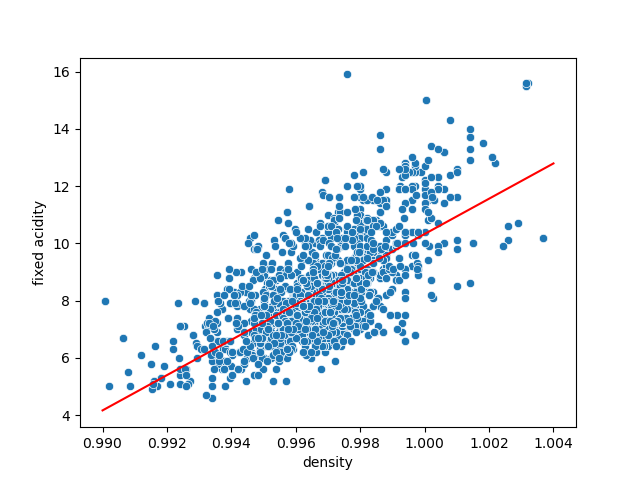

In [109]:
fig, ax = plt.subplots()
sns.scatterplot(data=wine, x='density', y='fixed acidity');
plt.plot(X_pred, y_pred, 'r');

We see that the values that we get are close to our approximation above. It we were using a finer grid for our approximation we would end up with the same values.

## Exercise

1. Import the dataset at this address: https://raw.githubusercontent.com/guiwitz/EHML/main/datasets/co2_countries.csv. This dataset contains information C02 emissions between 1990-2022 of Germany and France

2. With seaborn make a scatter plot of ```co2_per_capita``` vs ```Year```. Color data by country.

3. Using scikit learn's ```LinearRegression``` fit a model to the relation between ```co2_per_capita``` and ```Year``` for Germany and France **separately**.

4. Plot the scatterplot and the fitted linear models on top of it.

5. Which country can be better described by this linear model? Compute the mean square error of the two models.

6. What is the emission per capita predicted for France in 2030?

In [118]:
import pandas as pd
from sklearn.linear_model import LinearRegression

1.

In [119]:
co2 = pd.read_csv('datasets/co2_countries.csv')

In [120]:
co2

,Country,co2_per_capita,Year
0,France,8.740552,1990
1,France,8.903264,1991
2,France,9.600755,1992
3,France,8.842668,1993
4,France,8.603079,1994
...,...,...,...
59,Germany,10.869604,2017
60,Germany,10.654931,2018
61,Germany,10.119050,2019
62,Germany,9.279812,2020


2.

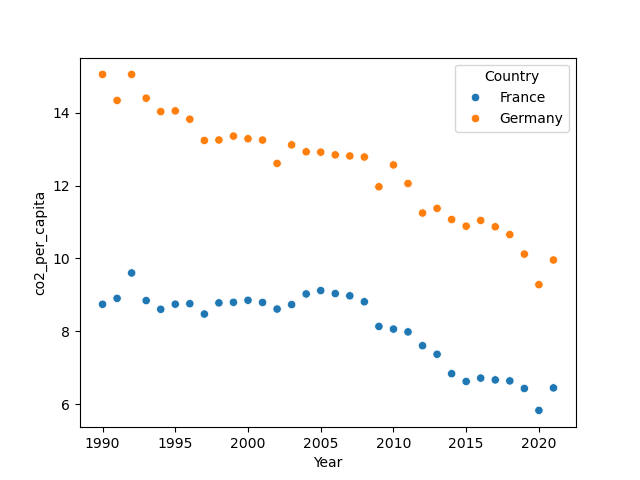

In [137]:
fig, ax = plt.subplots()
sns.scatterplot(data=co2, x='Year', y='co2_per_capita', hue='Country');

3.

In [138]:
model_f = LinearRegression()
model_g = LinearRegression()

co2_f = co2[co2.Country == 'France']
co2_g = co2[co2.Country == 'Germany']

X_f = co2_france[['Year']]
y_f = co2_france['co2_per_capita']

X_g = co2_germany[['Year']]
y_g = co2_germany['co2_per_capita']

model_g.fit(X=X_g, y=y_g)
model_f.fit(X=X_f, y=y_f)

LinearRegression()

4.

In [127]:
X_pred = np.arange(1990,2021)
y_pred_f = model_f.predict(X_pred[:, np.newaxis])
y_pred_g = model_g.predict(X_pred[:, np.newaxis])

/Users/gw18g940/miniforge3/envs/EHML2024/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/gw18g940/miniforge3/envs/EHML2024/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<Axes: xlabel='Year', ylabel='co2_per_capita'>

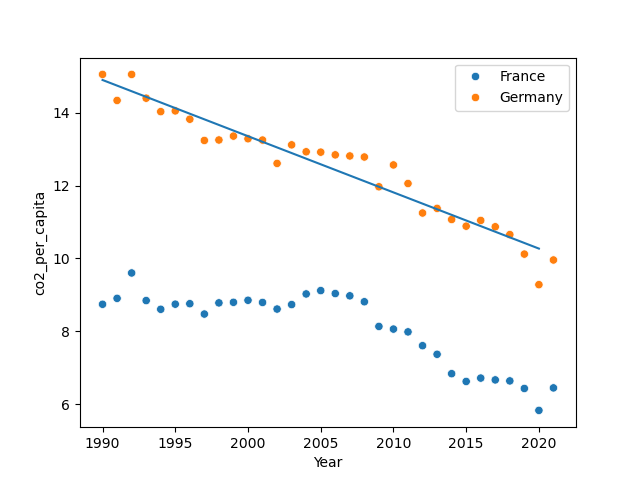

In [130]:
fig, ax = plt.subplots()
sns.scatterplot(data=co2, x='Year', y='co2_per_capita', hue='Country')
sns.lineplot(x=X_pred, y=y_pred_g)

<Axes: xlabel='Year', ylabel='co2_per_capita'>

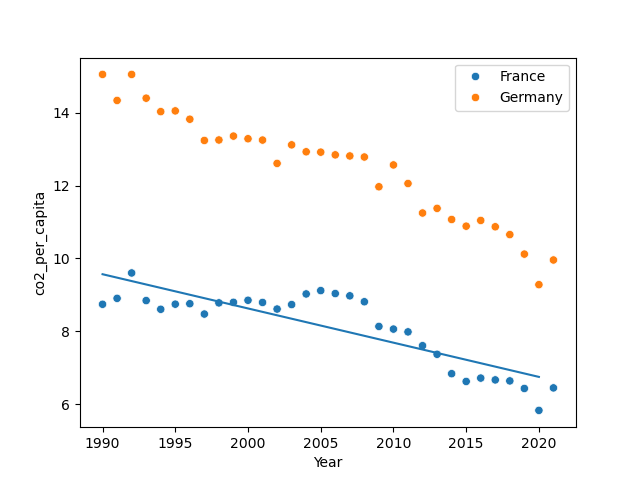

In [132]:
fig, ax = plt.subplots()
sns.scatterplot(data=co2, x='Year', y='co2_per_capita', hue='Country')
sns.lineplot(x=X_pred, y=y_pred_f)

5. France is better described by a linear model. Germany is composed of two linear regions.

In [135]:
np.sum((model_f.predict(X_f) - y_f)**2)

9.087356976890058

In [136]:
np.sum((model_g.predict(X_f) - y_g)**2)

4.306812349395056

6.

In [139]:
model_f.predict([[2030]])

/Users/gw18g940/miniforge3/envs/EHML2024/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.80566873])